In [1]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM

-> todo label tridimensionel

-> calculer matrice labels

-> envoyer visualisation

['ring' 'ring' 'ring' 'ring' 'ring' 'star' 'star' 'star' 'star' 'star'
 'tree' 'tree' 'tree' 'tree' 'tree']
1.0
CPU times: user 1.56 s, sys: 1.81 s, total: 3.37 s
Wall time: 1.09 s


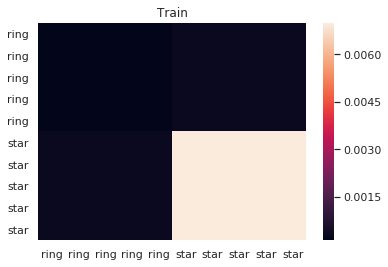

In [2]:
%%time
db = Database()
db2 = db.gen_database_test(4,10,5,0.1,True)
s = SVM(db2, 0.7, lambda x: pow(x,0.95))
print(db2[:,1])
s.learn()
print(s.score())
s.display_heatmap("train")
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies